In [18]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<FONT COLOR="FF0000">The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</FONT>''')

finite differences

Taylor's theorem:

\begin{align}
f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f^{(2)}(x_0)}{2!}h^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}h^n + R_n(x)\\
f(x_0 + h) = f(x_0) + f'(x_0)h + R_1(x)\\
x_0 = a\\
(x-a)=h\\
f(a+h) = f(a) + f'(a)h + R_1(x)\\
{f(a+h)\over h} = {f(a)\over h} + f'(a)+{R_1(x)\over h}\\
f'(a) = {f(a+h)-f(a)\over h} - {R_1(x)\over h}\\
f'(a)\approx {f(a+h)-f(a)\over h}\\
\end{align}


\begin{align}f'(x)\approx \frac{f(x+h) - f(x-h)}{2 h}\\
f''(x) \approx \frac{f(x+h) - 2 f(x) + f(x-h)}{h^{2}}
\end{align}

Finite difference for 2 variables

\begin{align}
f_{x}(x,y) \approx  \frac{f(x+h ,y) - f(x-h,y)}{2h}\\
f_{y}(x,y) \approx  \frac{f(x,y+k ) - f(x,y-k)}{2k}\\
f_{xx}(x,y) \approx  \frac{f(x+h ,y) - 2 f(x,y) + f(x-h,y)}{h^2}\\
f_{yy}(x,y) \approx  \frac{f(x,y+k) - 2 f(x,y) + f(x,y-k)}{k^2}\\
f_{xy}(x,y) \approx  \frac{f(x+h,y+k) - f(x+h,y-k) - f(x-h,y+k) + f(x-h,y-k)}{4hk}\\
\end{align}

Laplacian operator

\begin{align}
\Delta f = \nabla^2 f = \nabla \cdot \nabla f\\
\Delta f = \sum_{i=1}^n \frac {\partial^2 f}{\partial x^2_i}\\
\Delta f = \nabla^2 f = \frac {\partial^2 f}{\partial x^2} + \frac {\partial^2 f}{\partial y^2}\\
\end{align}

Laplacian operator (3x3)

1D

\begin{bmatrix}
1 & -2 & 1\\
\end{bmatrix}

2D
\begin{bmatrix}
0 & -1 & 0\\
-1 & +4 & -1\\
0 & -1 & 0\\
\end{bmatrix}

2D including diagonals:

\begin{bmatrix}
-1 & -1 & -1\\
-1 & +8 & -1\\
-1 & -1 & -1\\
\end{bmatrix}

3D :

\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix}

\begin{bmatrix}
0 & 1 & 0\\
1 & -6 & 1\\
0 & 1 & 0\\
\end{bmatrix}

\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix}


gradient operator
\begin{align}
\nabla f  = \left(\frac{\partial f}{\partial x_1 }, \dots,  \frac{\partial f}{\partial x_n }  \right)
\end{align}

2D

\begin{align}
\nabla f(x, y) =
\left(\frac{\partial f}{\partial x},
\frac{\partial f}{\partial y}\right)\\
\end{align}

3D

\begin{align}
\nabla f(x, y, z) =
\left(\frac{\partial f}{\partial x},
\frac{\partial f}{\partial y},
\frac{\partial f}{\partial z}\right)\\
\end{align}

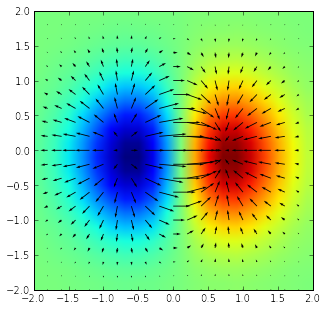

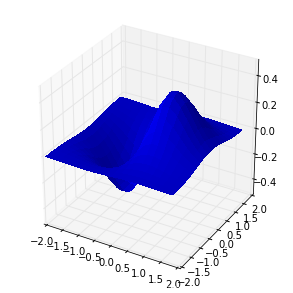

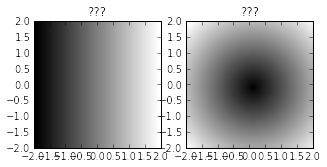

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage,interpolate
from scipy.ndimage.filters import convolve1d
from mpl_toolkits.mplot3d import Axes3D

r = np.arange(-2, 2, 0.2)
x,y = np.meshgrid(r,r)

z = x*np.exp(-x**2-y**2)

w = np.array([-1,0,+1])

dx = convolve1d(z,-w,axis=1)
dy = convolve1d(z,-w,axis=0)

plt.figure(figsize=[5,5])

plt.imshow(z,extent=[-2,2,-2,2])
plt.quiver(x,y,dx,dy)

fig3d = plt.figure(figsize=[5,5])
ax = fig3d.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, antialiased=False)

plt.figure(figsize=[5,5])

plt.subplot(1,2,1)
z = x
plt.imshow(z,extent=[-2,2,-2,2],cmap=cm.gray)
plt.title('???')

plt.subplot(1,2,2)
z = np.sqrt(x**2+y**2)
plt.imshow(z,extent=[-2,2,-2,2],cmap=cm.gray)
plt.title('???')

plt.show()

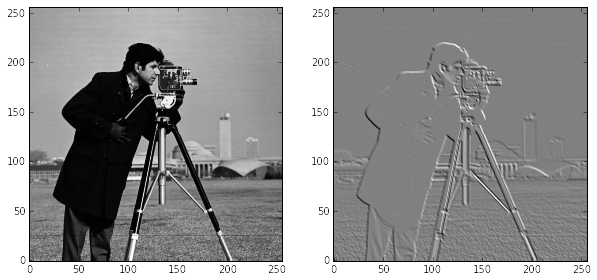

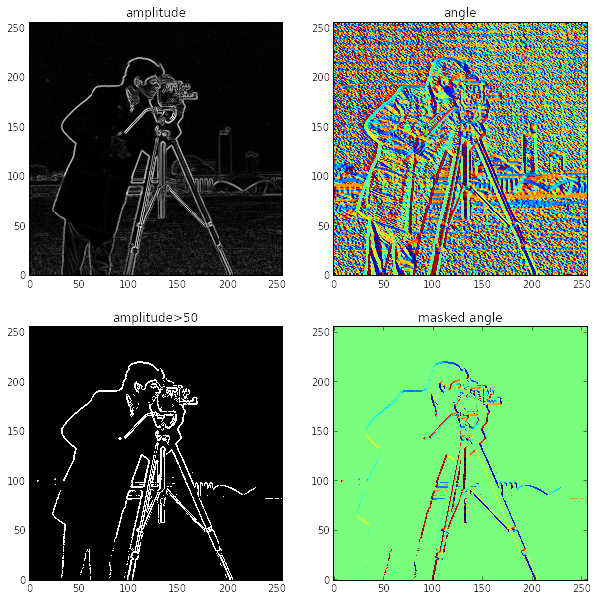

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as npy
from scipy import ndimage,interpolate
from scipy.ndimage.filters import convolve,convolve1d,gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
from skimage.data import camera

def Cx(ima):
    """x' derivative of image"""
    c = convolve1d(ima,npy.array([-1,0,1]),axis=1,cval=1)
    return c/2.0

def Cy(ima):
    """y' derivative of image"""
    c = convolve1d(ima,npy.array([-1,0,1]),axis=0,cval=1)
    return c/2.0

def grad(ima):
    """gradient of an image"""
    k = npy.array([[0,1,0],[1,0,-1],[0,-1,0]])
    s = convolve(ima,k)
    return s



im = camera().astype(np.float)[-1::-2,::2]
s = grad(im)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(1,2,2)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')

gx = Cx(im)
gy = Cy(im)

magnitude = np.sqrt(gx**2+gy**2)
angle = np.arctan2(gy,gx)
masked_angle = angle.copy()
masked_angle[magnitude<50]=0

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(magnitude,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('amplitude')
plt.subplot(2,2,2)
plt.imshow(angle,interpolation='nearest',cmap=cm.jet,origin='lower')
plt.title('angle')
plt.subplot(2,2,3)
plt.imshow(magnitude>50,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('amplitude>50')
plt.subplot(2,2,4)
plt.imshow(masked_angle,interpolation='nearest',cmap=cm.jet,origin='lower')
plt.title('masked angle')

plt.show()

\begin{align}
amplitude = \sqrt { (\frac{\partial f}{\partial x})^2 + (\frac{\partial f}{\partial y})^2 }\\
dir = \arctan ( \frac{\frac{\partial f}{\partial x}} {\frac{\partial f}{\partial y}})\\
\end{align}

border detector + lowpass

\begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix}

\begin{bmatrix}
2 & 1 & 0\\
1 & 0 & -1\\
0 & -1 & -2\\
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1\\
\end{bmatrix}



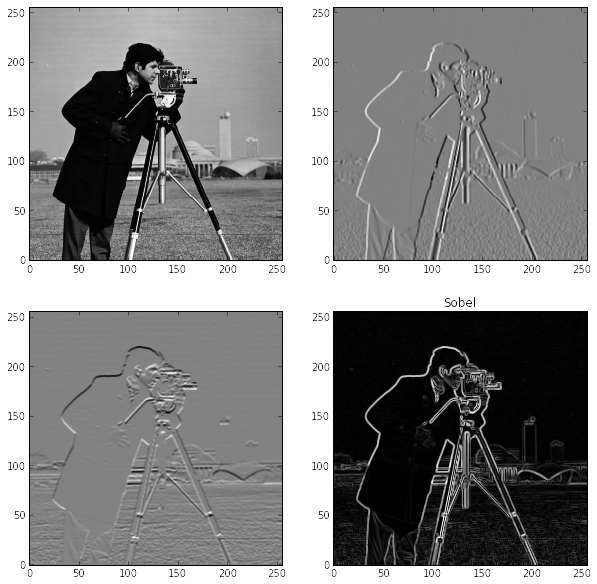

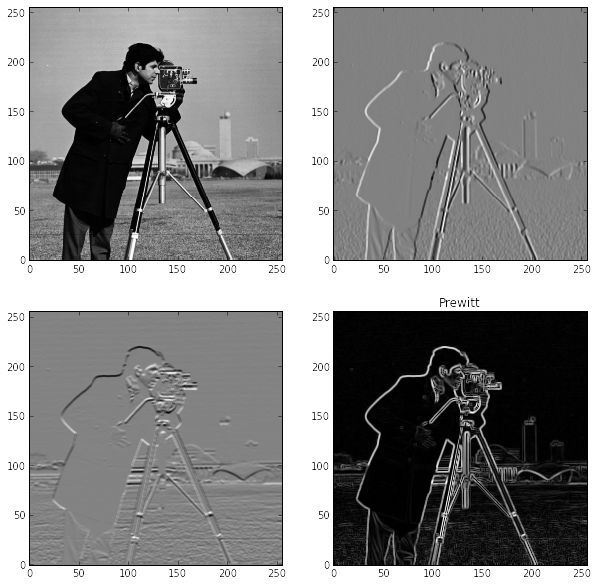

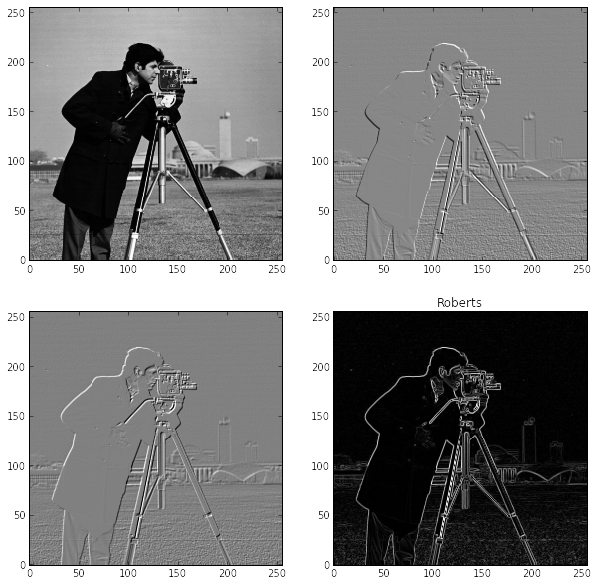

In [13]:
def sobel(ima):
    """Sobel  of image"""
    kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    ky = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)

def prewitt(ima):
    """Sobel  of image"""
    kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    ky = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)

def roberts(ima):
    """Sobel  of image"""
    kx = np.array([[1,0],[0,-1]])
    ky = np.array([[0,1],[-1,0]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)


sx,sy,s = sobel(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Sobel')

sx,sy,s = prewitt(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Prewitt')

sx,sy,s = roberts(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Roberts')

plt.show()

Difference of Gaussian (D.O.G) operator

Gaussian 2D kernel:

$g(x, y; t) = \frac {1}{2{\pi} t}e^{-(x^2+y^2)/2t}$

image convolution with a gaussian kernel:

$L(\cdot, \cdot ; t)\ = g(\cdot, \cdot ; t) * f(\cdot, \cdot)$


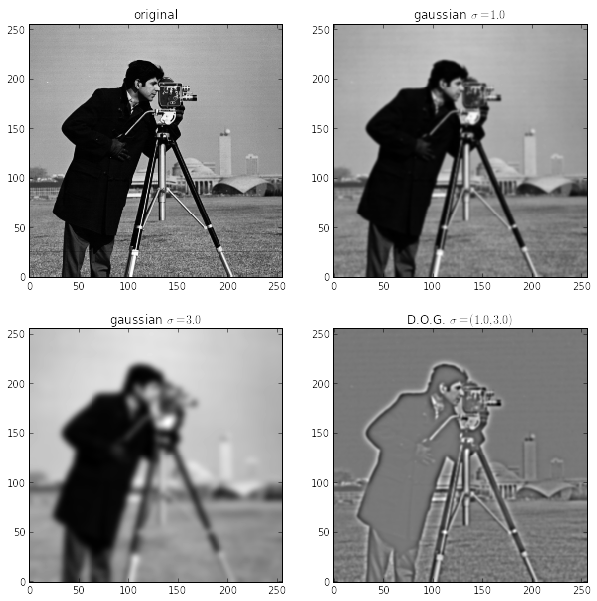

In [17]:
g1 = gaussian_filter(im,1)
g2 = gaussian_filter(im,3)


plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.subplot(2,2,2)
plt.imshow(g1,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('gaussian $\sigma=1.0$')
plt.subplot(2,2,3)
plt.imshow(g2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('gaussian $\sigma=3.0$')
plt.subplot(2,2,4)
plt.imshow(g1-g2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('D.O.G. $\sigma=(1.0,3.0)$')


plt.show()